In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...


In [7]:
import os

# Ensure the 'data' directory exists
os.makedirs("data", exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv("data/BA_reviews.csv", index=False)

print("File saved successfully!")


File saved successfully!


In [8]:
# Remove "✅ Trip Verified" from the reviews column
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "", regex=False).str.strip()


In [9]:
# Display the first few rows of the cleaned data
print(df.head())


                                             reviews
0  |   British airways lost bags in LHR then foun...
1  | The check in process and reward/loyalty prog...
2  |   We flew in November 2023, but it took this...
3  | I left for London from Johannesburg at 21:15...
4  |   After an excellent flight on a 777 CPT to ...


In [10]:
# Remove leading or trailing vertical bars and extra spaces
df["reviews"] = df["reviews"].str.strip().str.strip('|').str.strip()

# Verify the result
print(df.head())


                                             reviews
0  British airways lost bags in LHR then found th...
1  The check in process and reward/loyalty progra...
2  We flew in November 2023, but it took this lon...
3  I left for London from Johannesburg at 21:15 o...
4  After an excellent flight on a 777 CPT to LHR ...


In [11]:
import re

# Convert to lowercase and remove special characters/punctuation
df["reviews"] = df["reviews"].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Preview cleaned reviews
print(df.head())


                                             reviews
0  british airways lost bags in lhr then found th...
1  the check in process and rewardloyalty program...
2  we flew in november 2023 but it took this long...
3  i left for london from johannesburg at 2115 on...
4  after an excellent flight on a 777 cpt to lhr ...


In [12]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df["reviews"] = df["reviews"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print(df.head())


                                             reviews
0  british airways lost bags lhr found sent colog...
1  check process rewardloyalty program mess never...
2  flew november 2023 took long seek satisfactory...
3  left london johannesburg 2115 22 december 2024...
4  excellent flight 777 cpt lhr return good ba mo...


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean and process the text
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize the words (optional but recommended)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join the tokens back into a string
    return ' '.join(lemmatized_tokens)

# Apply the function to clean all reviews
df["cleaned_reviews"] = df["reviews"].apply(clean_text)
print(df.head())  # Check the cleaned reviews


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Iftikhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iftikhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iftikhar\AppData\Roaming\nltk_data...


                                             reviews  \
0  british airways lost bags lhr found sent colog...   
1  check process rewardloyalty program mess never...   
2  flew november 2023 took long seek satisfactory...   
3  left london johannesburg 2115 22 december 2024...   
4  excellent flight 777 cpt lhr return good ba mo...   

                                     cleaned_reviews  
0  british airway lost bag lhr found sent cologne...  
1  check process rewardloyalty program mess never...  
2  flew november took long seek satisfactory resp...  
3  left london johannesburg december issue flight...  
4  excellent flight cpt lhr return good ba moved ...  


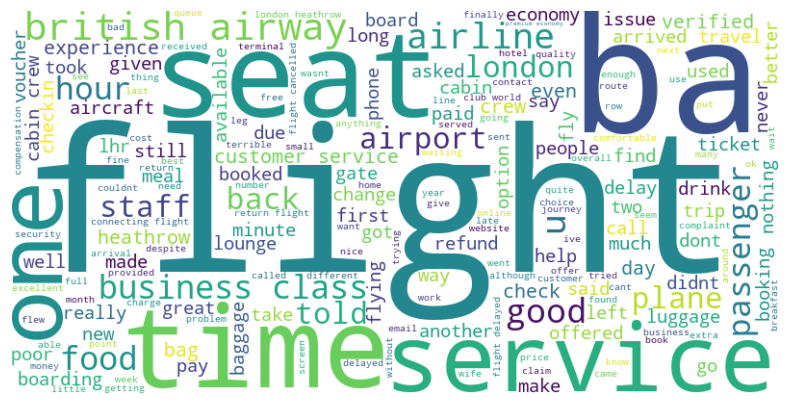

In [16]:
# Combine all the cleaned reviews into one large string
text = ' '.join(df["cleaned_reviews"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.show()


In [17]:
from textblob import TextBlob

# Perform sentiment analysis on each review
df["sentiment"] = df["cleaned_reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows of the sentiment scores
print(df[["reviews", "sentiment"]].head())

# Visualize the sentiment distribution
plt.figure(figsize=(6, 4))
df["sentiment"].hist(bins=30, color="skyblue")
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


ModuleNotFoundError: No module named 'textblob'

In [18]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/624.3 kB 1.3 MB/s eta 0:00:01
   - -------------------------------------- 30.7/624.3 kB 1.3 MB/s eta 0:00:01
   --- ----------------------------------- 61.4/624.3 kB 469.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/624.3 kB 581.0 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/624.3 kB 581.0 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/624.3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


                                             reviews  sentiment
0  british airways lost bags lhr found sent colog...  -0.066667
1  check process rewardloyalty program mess never...  -0.308333
2  flew november 2023 took long seek satisfactory...  -0.056439
3  left london johannesburg 2115 22 december 2024...   0.044049
4  excellent flight 777 cpt lhr return good ba mo...   0.206266


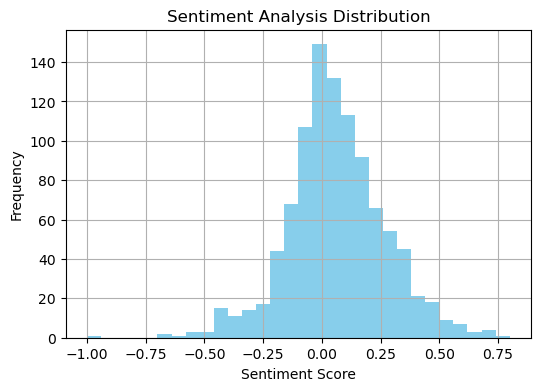

In [19]:
from textblob import TextBlob

# Perform sentiment analysis on each review
df["sentiment"] = df["cleaned_reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows of the sentiment scores
print(df[["reviews", "sentiment"]].head())

# Visualize the sentiment distribution
plt.figure(figsize=(6, 4))
df["sentiment"].hist(bins=30, color="skyblue")
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned reviews (convert text to a matrix of token counts)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["cleaned_reviews"])

# Apply LDA (Latent Dirichlet Allocation) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top 10 words for each topic
n_words = 10
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-n_words - 1:-1]]))


Topic #1:
service customer british airway airline travel flight plane need time
Topic #2:
flight ba hour customer told day service london time cancelled
Topic #3:
ba flight staff plane service year airline gate time people
Topic #4:
flight ba seat good crew food service cabin time class
Topic #5:
flight ba seat class business british airway service airline hour


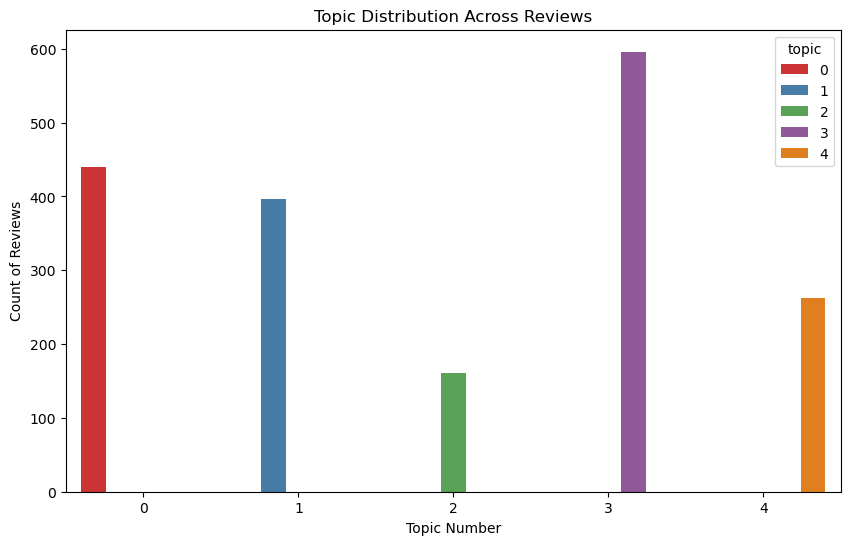

In [24]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing function
def preprocess_reviews(reviews):
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    processed_reviews = []
    for review in reviews:
        # Tokenize the review
        tokens = word_tokenize(review.lower())  # Lowercased and tokenized
        # Remove punctuation and stopwords, and lemmatize the words
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
        processed_reviews.append(tokens)

    return processed_reviews

# Example: Your reviews dataframe (replace this with your actual review column)
reviews = df['cleaned_reviews'].tolist()  # Assuming you already have a cleaned_reviews column

# Preprocess the reviews
processed_reviews = preprocess_reviews(reviews)

# Create a dictionary from the processed reviews
dictionary = corpora.Dictionary(processed_reviews)

# Create the corpus (document-term matrix)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Fit the LDA model (number of topics is an example, adjust as needed)
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topic distribution for each document (review)
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]

# Convert the topic distribution to a DataFrame
topic_counts = []
for i, dist in enumerate(topic_distribution):
    for topic_num, prob in dist:
        topic_counts.append([i, topic_num, prob])

topic_df = pd.DataFrame(topic_counts, columns=["review_id", "topic", "probability"])

# Create a visualization of the topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=topic_df, x="topic", hue="topic", palette="Set1")
plt.title("Topic Distribution Across Reviews")
plt.xlabel("Topic Number")
plt.ylabel("Count of Reviews")
plt.show()


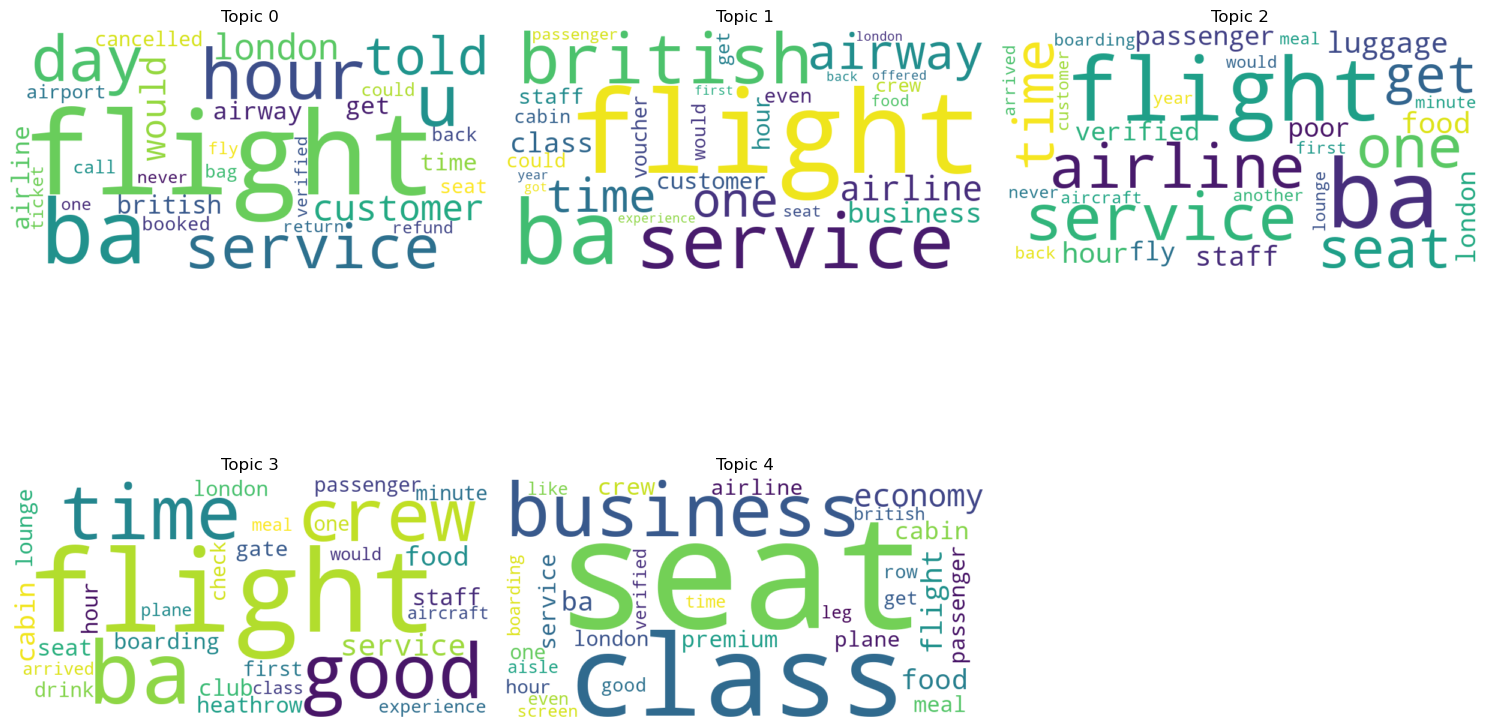

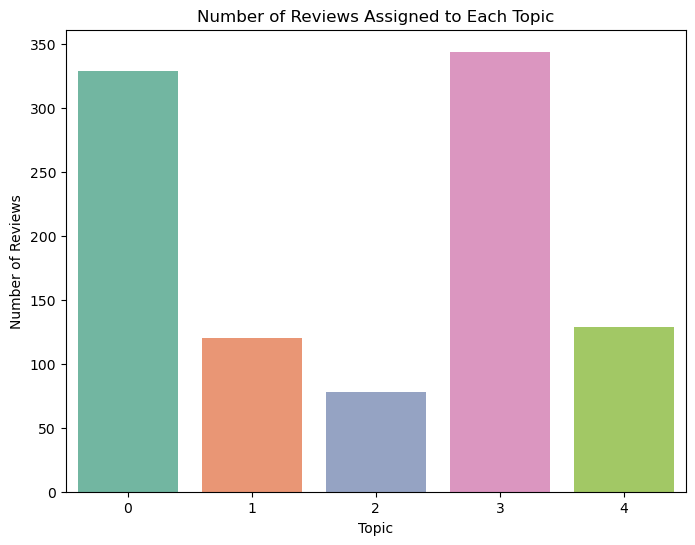


Topic 0:
- british airway lost bag lhr found sent cologne sat two day told one give spent day europe without bag bought clothes ba refused reimburse closed case day returned state bag showed front door wont let talk management say email mail dont call customer service say escalate never know dont update claim form
- flew november took long seek satisfactory response ba ultimately never received ba refused rebook son cost day due lack underground service alternate service ba forced u buy new ticket never admitted subjected u disparate treatment flying recommending ba
- flight ba arrived rome december passenger received sm ba say luggage left london wife completed required form queue hour checked ba agent rome believe baggage would arrive last flight night would likely delivered next day nobody ba rome airport made contact u explain happened bag would arrive finally got luggage delivered u sunday december day due leave rome waiting period contact initiated either ba rome agent several o

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string



# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Fit the LDA model (adjust the number of topics based on your requirement)
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Assign topics to reviews: Find the most probable topic for each review
topics_per_review = []
for doc in corpus:
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability and get the most probable topic
    most_probable_topic = max(topic_probabilities, key=lambda x: x[1])[0]
    topics_per_review.append(most_probable_topic)

# Add the topic information to your dataframe
df['topic'] = topics_per_review

# Visualize the most common words for each topic using WordCloud
plt.figure(figsize=(15, 10))
for t in range(lda_model.num_topics):
    plt.subplot(2, 3, t + 1)
    plt.title(f"Topic {t}")
    # Collect the words for this topic
    words = dict(lda_model.show_topic(t, topn=30))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Visualize the distribution of reviews across topics
topic_distribution = df['topic'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=topic_distribution.index, y=topic_distribution.values, palette="Set2")
plt.title("Number of Reviews Assigned to Each Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.show()

# If you want to display the actual reviews for each topic (Optional)
for topic_num in range(lda_model.num_topics):
    print(f"\nTopic {topic_num}:")
    topic_reviews = df[df['topic'] == topic_num]['cleaned_reviews'].head(10)  # Show top 10 reviews for this topic
    for review in topic_reviews:
        print(f"- {review}")
